# WS1: Load Data and Check

In [120]:
import pandas as pd
import numpy as np

df = pd.read_csv("data_clean_bfclean.csv")

In [121]:
df.sample(5)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_M
9,Ksb,216.0,TREMONT,n,2.0,2,90.5
3,Ninan,201.0,BEREY,N,1.0,-2,700.5
2,Lam,NaN,LETON,N,NaN,1,850
7,Shasa,213.0,TREMONT,Y,1.0,1,NaN
5,Tom,207.0,BEREY,Y,3.0,1.5,800.8


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           11 non-null     object 
 1   ST_NUM        8 non-null      float64
 2   ST_NAME       11 non-null     object 
 3   OWN_OCCUPIED  10 non-null     object 
 4   NUM_BEDROOMS  10 non-null     float64
 5   NUM_BATH      11 non-null     object 
 6   SQ_M          10 non-null     object 
dtypes: float64(2), object(5)
memory usage: 748.0+ bytes


# WS2: Delete Column where not use

In [123]:
df.columns

Index(['PID', 'ST_NUM', 'ST_NAME', 'OWN_OCCUPIED', 'NUM_BEDROOMS', 'NUM_BATH',
       'SQ_M'],
      dtype='object')

In [124]:
to_drop = ["ST_NUM", "ST_NAME"]
to_drop

['ST_NUM', 'ST_NAME']

In [125]:
df.drop(columns=to_drop).sample(5)

,PID,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_M
2,Lam,N,NaN,1,850
0,กอบ,Y,3.0,1,1000
7,Shasa,Y,1.0,1,NaN
10,Jib,12,2.0,2,70.2
9,Ksb,n,2.0,2,90.5


In [126]:
df.drop(columns=to_drop, inplace=True) #Really drop the columns
df.head()

,PID,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_M
0,กอบ,Y,3.0,1,1000
1,แนน,n,3.0,1,--
2,Lam,N,NaN,1,850
3,Ninan,N,1.0,-2,700.5
4,Nii,Y,2.0,2ABC,1600


# WS3: Change column name

In [127]:
df = df.rename(columns={
    'PID':'id',
    'OWN_OCCUPIED':'own',
    'NUM_BEDROOMS':'bedroom',
    'NUM_BATH':'bathroom',
    'SQ_M':'area',
    })

In [128]:
df.head()

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000
1,แนน,n,3.0,1,--
2,Lam,N,NaN,1,850
3,Ninan,N,1.0,-2,700.5
4,Nii,Y,2.0,2ABC,1600


In [129]:
df.to_csv("data_clean1_after_drop_column.csv", index=False)

# WS4: Check Category Column

In [130]:
colm = 'own'
df.groupby(colm).size()

own
12    1
N     2
Y     5
n     2
dtype: int64

In [131]:
df.pivot_table(index=colm, aggfunc='count')

,area,bathroom,bedroom,id
own,,,,
12,1,1,1,1
N,2,2,1,2
Y,4,5,5,5
n,2,2,2,2


<Axes: xlabel='own', ylabel='count'>

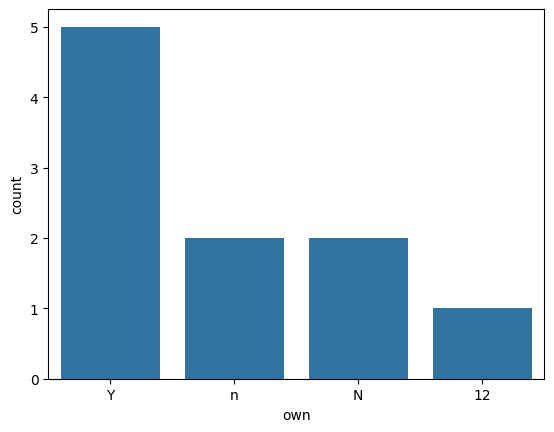

In [132]:
import seaborn as sns
sns.countplot(x='own', data=df)

In [133]:
cols_to_check = df.select_dtypes(include=['object']).columns
cols_to_check = cols_to_check.append(df.select_dtypes(include=['category']).columns)
cols_to_check


Index(['id', 'own', 'bathroom', 'area'], dtype='object')

In [134]:
cols_to_check = ['own', 'bathroom', 'area']

for colm in cols_to_check:
    print(f"Column: {colm}")
    colm_vals = df[colm].unique()
    for val in colm_vals:
        print(f"  Value: {val}, Count: {df[df[colm] == val].shape[0]}")
    print("----------------------------------")

Column: own
  Value: Y, Count: 5
  Value: n, Count: 2
  Value: N, Count: 2
  Value: nan, Count: 0
  Value: 12, Count: 1
----------------------------------
Column: bathroom
  Value: 1, Count: 4
  Value: -2, Count: 1
  Value: 2ABC, Count: 1
  Value: 1.5, Count: 1
  Value: 3, Count: 1
  Value: 2, Count: 3
----------------------------------
Column: area
  Value: 1000, Count: 1
  Value: --, Count: 1
  Value: 850, Count: 1
  Value: 700.5, Count: 1
  Value: 1600, Count: 1
  Value: 800.8, Count: 1
  Value: 950, Count: 1
  Value: nan, Count: 0
  Value: 1800, Count: 1
  Value: 90.5, Count: 1
  Value: 70.2, Count: 1
----------------------------------


In [135]:
df.own = df.own.str.upper()

In [136]:
colm = 'own'
df.groupby(colm).size()

own
12    1
N     4
Y     5
dtype: int64

In [137]:
df.to_csv("data_clean2_after_str_upper.csv", index=False)

In [138]:
colm = 'bedroom'
df.groupby(colm).size()

bedroom
1.0    2
2.0    5
3.0    3
dtype: int64

In [139]:
colm = 'bathroom'
df.groupby(colm).size()

bathroom
-2      1
1       4
1.5     1
2       3
2ABC    1
3       1
dtype: int64

In [140]:
cols_to_check = ['own', 'bedroom', 'bathroom']

for i, col in enumerate(cols_to_check):
    print(df.groupby(col).size())
    print("----------------------------------")

own
12    1
N     4
Y     5
dtype: int64
----------------------------------
bedroom
1.0    2
2.0    5
3.0    3
dtype: int64
----------------------------------
bathroom
-2      1
1       4
1.5     1
2       3
2ABC    1
3       1
dtype: int64
----------------------------------


# WS5: manage with wrong data type

## Check data type

In [141]:
df.dtypes

id           object
own          object
bedroom     float64
bathroom     object
area         object
dtype: object

## Search Data

In [142]:
df[df['own'] == '12']

,id,own,bedroom,bathroom,area
10,Jib,12,2.0,2,70.2


In [143]:
df.loc[10]

id           Jib
own           12
bedroom      2.0
bathroom       2
area        70.2
Name: 10, dtype: object

## Edit data

In [144]:
df.at[10, "own"] = 'Y'
df.loc[10]

id           Jib
own            Y
bedroom      2.0
bathroom       2
area        70.2
Name: 10, dtype: object

In [145]:
df.at[10, "own"] = '12'
df.loc[10]

id           Jib
own           12
bedroom      2.0
bathroom       2
area        70.2
Name: 10, dtype: object

In [146]:
df['own'] = np.where(df['own'] == '12', 'Y', df['own'])
df.loc[10]

id           Jib
own            Y
bedroom      2.0
bathroom       2
area        70.2
Name: 10, dtype: object

In [147]:
df.at[10, "own"] = '12'
df.loc[10]

id           Jib
own           12
bedroom      2.0
bathroom       2
area        70.2
Name: 10, dtype: object

In [148]:
to_change = '12'
df.replace(to_change, 'Y', inplace=True)
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000
1,แนน,N,3.0,1,--
2,Lam,N,NaN,1,850
3,Ninan,N,1.0,-2,700.5
4,Nii,Y,2.0,2ABC,1600
5,Tom,Y,3.0,1.5,800.8
6,Green,NaN,2.0,3,950
7,Shasa,Y,1.0,1,NaN
8,Alisa,Y,2.0,2,1800
9,Ksb,N,2.0,2,90.5


In [149]:
to_change = '12'
df['own'].replace(to_change, 'Y', inplace=True)
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000
1,แนน,N,3.0,1,--
2,Lam,N,NaN,1,850
3,Ninan,N,1.0,-2,700.5
4,Nii,Y,2.0,2ABC,1600
5,Tom,Y,3.0,1.5,800.8
6,Green,NaN,2.0,3,950
7,Shasa,Y,1.0,1,NaN
8,Alisa,Y,2.0,2,1800
9,Ksb,N,2.0,2,90.5


In [150]:
df.at[10, "own"] = '12'
df.loc[10]

to_change = ['12',12,25]
df['own'].replace(to_change, np.nan, inplace=True)
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000
1,แนน,N,3.0,1,--
2,Lam,N,NaN,1,850
3,Ninan,N,1.0,-2,700.5
4,Nii,Y,2.0,2ABC,1600
5,Tom,Y,3.0,1.5,800.8
6,Green,NaN,2.0,3,950
7,Shasa,Y,1.0,1,NaN
8,Alisa,Y,2.0,2,1800
9,Ksb,N,2.0,2,90.5


# WS6: Filter and Delete Row

In [151]:
df.at[10, "own"] = '12'
df.loc[10]

id           Jib
own           12
bedroom      2.0
bathroom       2
area        70.2
Name: 10, dtype: object

In [152]:
df.own == '12'

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10     True
Name: own, dtype: bool

In [153]:
problem_idx = df[df['own'] == '12'].index
problem_idx

Index([10], dtype='int64')

In [154]:
df.loc[problem_idx]

,id,own,bedroom,bathroom,area
10,Jib,12,2.0,2,70.2


In [155]:
df.drop(problem_idx, inplace=True)

In [156]:
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000
1,แนน,N,3.0,1,--
2,Lam,N,NaN,1,850
3,Ninan,N,1.0,-2,700.5
4,Nii,Y,2.0,2ABC,1600
5,Tom,Y,3.0,1.5,800.8
6,Green,NaN,2.0,3,950
7,Shasa,Y,1.0,1,NaN
8,Alisa,Y,2.0,2,1800
9,Ksb,N,2.0,2,90.5


In [157]:
problem_idx = df[(df.own != "Y") & (df.own != "N")].index
problem_idx

Index([6], dtype='int64')

In [158]:
df.loc[problem_idx]

,id,own,bedroom,bathroom,area
6,Green,NaN,2.0,3,950


In [159]:
df.drop(problem_idx, inplace=True)

In [160]:
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000
1,แนน,N,3.0,1,--
2,Lam,N,NaN,1,850
3,Ninan,N,1.0,-2,700.5
4,Nii,Y,2.0,2ABC,1600
5,Tom,Y,3.0,1.5,800.8
7,Shasa,Y,1.0,1,NaN
8,Alisa,Y,2.0,2,1800
9,Ksb,N,2.0,2,90.5


In [161]:
df.at[10, "own"] = '12'
df = df[df.own.isin(['Y', 'N',]) | df.own.isnull()]
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000
1,แนน,N,3.0,1,--
2,Lam,N,NaN,1,850
3,Ninan,N,1.0,-2,700.5
4,Nii,Y,2.0,2ABC,1600
5,Tom,Y,3.0,1.5,800.8
7,Shasa,Y,1.0,1,NaN
8,Alisa,Y,2.0,2,1800
9,Ksb,N,2.0,2,90.5


In [162]:
df.groupby('own').size()

own
N    4
Y    5
dtype: int64

# WS7: filter number from object/string

In [163]:
df = pd.read_csv("data_clean2_after_str_upper.csv")
print(df.dtypes)
df

id           object
own          object
bedroom     float64
bathroom     object
area         object
dtype: object


,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000
1,แนน,N,3.0,1,--
2,Lam,N,NaN,1,850
3,Ninan,N,1.0,-2,700.5
4,Nii,Y,2.0,2ABC,1600
5,Tom,Y,3.0,1.5,800.8
6,Green,NaN,2.0,3,950
7,Shasa,Y,1.0,1,NaN
8,Alisa,Y,2.0,2,1800
9,Ksb,N,2.0,2,90.5


In [164]:
def detect_num(dataframe, column_name):
    df[column_name] = df[column_name].apply(lambda x: np.nan if str(x).isdigit() else x)
    return df

df = detect_num(df.copy(), 'own')
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000
1,แนน,N,3.0,1,--
2,Lam,N,NaN,1,850
3,Ninan,N,1.0,-2,700.5
4,Nii,Y,2.0,2ABC,1600
5,Tom,Y,3.0,1.5,800.8
6,Green,NaN,2.0,3,950
7,Shasa,Y,1.0,1,NaN
8,Alisa,Y,2.0,2,1800
9,Ksb,N,2.0,2,90.5


In [165]:
df.dropna(subset=['own'], inplace=True)
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000
1,แนน,N,3.0,1,--
2,Lam,N,NaN,1,850
3,Ninan,N,1.0,-2,700.5
4,Nii,Y,2.0,2ABC,1600
5,Tom,Y,3.0,1.5,800.8
7,Shasa,Y,1.0,1,NaN
8,Alisa,Y,2.0,2,1800
9,Ksb,N,2.0,2,90.5


# WS8: manage float value

In [166]:
df['area_num'] = pd.to_numeric(df.area, errors='coerce', downcast='float')

In [167]:
print(df.dtypes)
df

id           object
own          object
bedroom     float64
bathroom     object
area         object
area_num    float32
dtype: object


,id,own,bedroom,bathroom,area,area_num
0,กอบ,Y,3.0,1,1000,1000.000000
1,แนน,N,3.0,1,--,NaN
2,Lam,N,NaN,1,850,850.000000
3,Ninan,N,1.0,-2,700.5,700.500000
4,Nii,Y,2.0,2ABC,1600,1600.000000
5,Tom,Y,3.0,1.5,800.8,800.799988
7,Shasa,Y,1.0,1,NaN,NaN
8,Alisa,Y,2.0,2,1800,1800.000000
9,Ksb,N,2.0,2,90.5,90.500000


In [168]:
df.describe()

,bedroom,area_num
count,8.000000,7.000000
mean,2.125000,977.399963
std,0.834523,573.802490
min,1.000000,90.500000
25%,1.750000,750.650024
50%,2.000000,850.000000
75%,3.000000,1300.000000
max,3.000000,1800.000000


In [169]:
df[df.area_num.isnull()]

,id,own,bedroom,bathroom,area,area_num
1,แนน,N,3.0,1,--,NaN
7,Shasa,Y,1.0,1,NaN,NaN


In [170]:
df[df.area_num.notnull()]

,id,own,bedroom,bathroom,area,area_num
0,กอบ,Y,3.0,1,1000,1000.000000
2,Lam,N,NaN,1,850,850.000000
3,Ninan,N,1.0,-2,700.5,700.500000
4,Nii,Y,2.0,2ABC,1600,1600.000000
5,Tom,Y,3.0,1.5,800.8,800.799988
8,Alisa,Y,2.0,2,1800,1800.000000
9,Ksb,N,2.0,2,90.5,90.500000


# WS9: Delete and Change Column name

In [171]:
df.drop(columns="area", inplace=True)
df.head()
df.dtypes

id           object
own          object
bedroom     float64
bathroom     object
area_num    float32
dtype: object

In [172]:
df.describe()

,bedroom,area_num
count,8.000000,7.000000
mean,2.125000,977.399963
std,0.834523,573.802490
min,1.000000,90.500000
25%,1.750000,750.650024
50%,2.000000,850.000000
75%,3.000000,1300.000000
max,3.000000,1800.000000


# WS10: Manage Number value

In [173]:
df.bathroom = pd.to_numeric(df.bathroom, errors='coerce', downcast='integer')
df.dtypes

id           object
own          object
bedroom     float64
bathroom    float64
area_num    float32
dtype: object

In [174]:
df

,id,own,bedroom,bathroom,area_num
0,กอบ,Y,3.0,1.0,1000.000000
1,แนน,N,3.0,1.0,NaN
2,Lam,N,NaN,1.0,850.000000
3,Ninan,N,1.0,-2.0,700.500000
4,Nii,Y,2.0,NaN,1600.000000
5,Tom,Y,3.0,1.5,800.799988
7,Shasa,Y,1.0,1.0,NaN
8,Alisa,Y,2.0,2.0,1800.000000
9,Ksb,N,2.0,2.0,90.500000


In [175]:
def float2int(val):
    if val % 1 == 0:
        return int(val)
    else:
        return np.nan
    
df.bathroom = df.bathroom.apply(float2int)
df

,id,own,bedroom,bathroom,area_num
0,กอบ,Y,3.0,1.0,1000.000000
1,แนน,N,3.0,1.0,NaN
2,Lam,N,NaN,1.0,850.000000
3,Ninan,N,1.0,-2.0,700.500000
4,Nii,Y,2.0,NaN,1600.000000
5,Tom,Y,3.0,NaN,800.799988
7,Shasa,Y,1.0,1.0,NaN
8,Alisa,Y,2.0,2.0,1800.000000
9,Ksb,N,2.0,2.0,90.500000


In [176]:
df.dtypes

id           object
own          object
bedroom     float64
bathroom    float64
area_num    float32
dtype: object

In [177]:
df = df[df.bathroom.notnull()]
df

,id,own,bedroom,bathroom,area_num
0,กอบ,Y,3.0,1.0,1000.0
1,แนน,N,3.0,1.0,NaN
2,Lam,N,NaN,1.0,850.0
3,Ninan,N,1.0,-2.0,700.5
7,Shasa,Y,1.0,1.0,NaN
8,Alisa,Y,2.0,2.0,1800.0
9,Ksb,N,2.0,2.0,90.5


In [178]:
df.bathroom = df.bathroom.astype(int)
df.dtypes

C:\Users\ahmad\AppData\Local\Temp\ipykernel_17952\144949971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.bathroom = df.bathroom.astype(int)


id           object
own          object
bedroom     float64
bathroom      int32
area_num    float32
dtype: object

In [179]:
(df.bathroom <=0).sum()

1

In [180]:
df.groupby('bathroom').count()

,id,own,bedroom,area_num
bathroom,,,,
-2,1,1,1,1
1,4,4,3,2
2,2,2,2,2


In [181]:
df = df[df.bathroom > 0]
df

,id,own,bedroom,bathroom,area_num
0,กอบ,Y,3.0,1,1000.0
1,แนน,N,3.0,1,NaN
2,Lam,N,NaN,1,850.0
7,Shasa,Y,1.0,1,NaN
8,Alisa,Y,2.0,2,1800.0
9,Ksb,N,2.0,2,90.5


# WS11: manage bedroom

In [183]:
df = df[df.bedroom.notnull()]
df

,id,own,bedroom,bathroom,area_num
0,กอบ,Y,3.0,1,1000.0
1,แนน,N,3.0,1,NaN
7,Shasa,Y,1.0,1,NaN
8,Alisa,Y,2.0,2,1800.0
9,Ksb,N,2.0,2,90.5


In [184]:
df.bedroom = df.bedroom.astype(int)
df.bedroom = df.bedroom.astype('category')
df.dtypes

id            object
own           object
bedroom     category
bathroom       int32
area_num     float32
dtype: object

In [185]:
df.bbathroomat = df.bathroom.astype(int)
df.bathroom = df.bathroom.astype('category')
df.dtypes

C:\Users\ahmad\AppData\Local\Temp\ipykernel_17952\2559399766.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.bbathroomat = df.bathroom.astype(int)


id            object
own           object
bedroom     category
bathroom    category
area_num     float32
dtype: object

In [186]:
df

,id,own,bedroom,bathroom,area_num
0,กอบ,Y,3,1,1000.0
1,แนน,N,3,1,NaN
7,Shasa,Y,1,1,NaN
8,Alisa,Y,2,2,1800.0
9,Ksb,N,2,2,90.5


In [187]:
df.to_csv("data_clean5.csv", index=False)

# WS12: manage duplicate data

In [202]:
df = pd.read_csv("data_clean6_after_clean_bedroom_dup.csv")
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3,1,1000.0
1,แนน,N,3,1,NaN
2,Green,NaN,2,3,950.0
3,Shasa,Y,1,1,NaN
4,Alisa,Y,2,2,1800.0
5,Alisa,Y,2,2,1200.0
6,Ksb,N,2,2,90.5
7,Ksb,N,2,2,90.5
8,Jib,NaN,2,2,70.2


In [199]:
df[df.duplicated]

,id,own,bedroom,bathroom,area
7,Ksb,N,2,2,90.5


In [194]:
df[df.duplicated('id')]

,id,own,bedroom,bathroom,area
5,Alisa,Y,2,2,1200.0
7,Ksb,N,2,2,90.5


In [200]:
df[df.duplicated(['id','area'])]

,id,own,bedroom,bathroom,area
7,Ksb,N,2,2,90.5


In [196]:
df.drop_duplicates(inplace=True)
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3,1,1000.0
1,แนน,N,3,1,NaN
2,Green,NaN,2,3,950.0
3,Shasa,Y,1,1,NaN
4,Alisa,Y,2,2,1800.0
5,Alisa,Y,2,2,1200.0
6,Ksb,N,2,2,90.5
8,Jib,NaN,2,2,70.2


In [197]:
df.drop_duplicates(subset='id', inplace=True)
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3,1,1000.0
1,แนน,N,3,1,NaN
2,Green,NaN,2,3,950.0
3,Shasa,Y,1,1,NaN
4,Alisa,Y,2,2,1800.0
6,Ksb,N,2,2,90.5
8,Jib,NaN,2,2,70.2


In [201]:
df.drop_duplicates(subset='id', keep='last', inplace=True)
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3,1,1000.0
1,แนน,N,3,1,NaN
2,Green,NaN,2,3,950.0
3,Shasa,Y,1,1,NaN
5,Alisa,Y,2,2,1200.0
7,Ksb,N,2,2,90.5
8,Jib,NaN,2,2,70.2


In [203]:
df.sort_values('area', inplace=True)
df.drop_duplicates(subset='id', keep='last', inplace=True)
df

,id,own,bedroom,bathroom,area
8,Jib,NaN,2,2,70.2
7,Ksb,N,2,2,90.5
2,Green,NaN,2,3,950.0
0,กอบ,Y,3,1,1000.0
4,Alisa,Y,2,2,1800.0
1,แนน,N,3,1,NaN
3,Shasa,Y,1,1,NaN


# WS13: Last Check

In [205]:
(df.area <=0).sum()

0

In [206]:
(df.bathroom <=0).sum()

0

In [208]:
(df.bedroom <=0).sum()

0

In [209]:
df.isnull().sum()

id          0
own         2
bedroom     0
bathroom    0
area        2
dtype: int64

In [210]:
cols_to_check = ['own', 'bedroom', 'bathroom']
for i, col in enumerate(cols_to_check):
    print(f"Column: {col}")
    print(df.groupby(col).size())
    print("----------------------------------")

Column: own
own
N    2
Y    3
dtype: int64
----------------------------------
Column: bedroom
bedroom
1    1
2    4
3    2
dtype: int64
----------------------------------
Column: bathroom
bathroom
1    3
2    3
3    1
dtype: int64
----------------------------------


# WS14: read file with assign data type

In [211]:
df = pd.read_csv("data_clean6_after_clean_bedroom_dup.csv",
                 dtype={"bedroom": "category",
                        "bathroom": "category",})
df.dtypes

id            object
own           object
bedroom     category
bathroom    category
area         float64
dtype: object

In [212]:
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3,1,1000.0
1,แนน,N,3,1,NaN
2,Green,NaN,2,3,950.0
3,Shasa,Y,1,1,NaN
4,Alisa,Y,2,2,1800.0
5,Alisa,Y,2,2,1200.0
6,Ksb,N,2,2,90.5
7,Ksb,N,2,2,90.5
8,Jib,NaN,2,2,70.2


In [213]:
df.describe()

,area
count,7.000000
mean,743.028571
std,675.668599
min,70.200000
25%,90.500000
50%,950.000000
75%,1100.000000
max,1800.000000
